Grupo 2: Favio Onton, Encalada Lucas, Javier Castronuovo, Damian Nutz, Mario Alberti Manzur

### PROBLEMA A RESOLVER
Determinar en base a qué parametros una canción es más probable a convertirse en un exito

### EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from pydotplus import graph_from_dot_data
import graphviz

In [2]:
# se crean los dataframes con los archivos .csv
df_80s = pd.read_csv("/datasets/datasets-spotify/dataset-of-80s.csv")
df_70s = pd.read_csv('/datasets/datasets-spotify/dataset-of-70s.csv')
df_90s = pd.read_csv('/datasets/datasets-spotify/dataset-of-90s.csv')
df_00s = pd.read_csv('/datasets/datasets-spotify/dataset-of-00s.csv')
df_10s = pd.read_csv('/datasets/datasets-spotify/dataset-of-10s.csv')

# agregamos la columna de la decada, como entero porque a medida que crece el año
# la forma de ver la musica puede cambiar
df_70s['decade'] = 1970
df_80s['decade'] = 1980
df_90s['decade'] = 1990
df_00s['decade'] = 2000
df_10s['decade'] = 2010

In [3]:
# cantidad de registros de los dataframes

df_70s.shape # 7766
df_80s.shape  # 6908
df_90s.shape # 5520
df_00s.shape # 5872
df_10s.shape # 6398


(6398, 20)

In [4]:
df_general = pd.concat([df_70s,df_80s,df_90s, df_00s, df_10s])

In [5]:
df_general

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Porque?,Reginaldo Rossi,spotify:track:28KC2wl7jDv6Ms1Uc0OMpm,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000000,0.0515,0.7300,131.073,141067,4,28.79763,6,0,1970
1,Free Jazz,Maria Teresa Luciani,spotify:track:0zagn8PNnM7pM8pz1gXOAD,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492000,0.1180,0.0390,75.619,228224,4,44.10303,9,0,1970
2,Reject of Society,Crass,spotify:track:18eNASEiuAhO2ML5LBIoG4,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000000,0.1300,0.7680,181.291,66800,3,25.23004,6,0,1970
3,Yeah !,The Jets,spotify:track:1UlJzHc8E5EprQFJxjSyPL,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836000,0.5790,0.8260,144.383,155395,4,55.62066,7,0,1970
4,Gotta Find A Way,The Moments,spotify:track:1Jtlirju8tUXTtvyZJAN5v,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000000,0.0815,0.3580,130.438,218333,4,34.90979,12,1,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0,2010
6394,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1,2010
6395,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1,2010
6396,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,2010


In [6]:
df_general_hits = df_general.loc[df_general['target']==1, :]

In [7]:
df_general_no_hits = df_general.loc[df_general['target']==0, :]

In [8]:
df_general['target'].value_counts()

0    16232
1    16232
Name: target, dtype: int64

In [9]:
hits_70s = df_70s.loc[df_70s['target'] == 1,:]
hits_80s = df_80s.loc[df_80s['target'] == 1,:]
hits_90s = df_90s.loc[df_90s['target'] == 1,:]
hits_00s = df_00s.loc[df_00s['target'] == 1,:]
hits_10s = df_10s.loc[df_10s['target'] == 1,:]

no_hits_70s = df_70s.loc[df_70s['target'] == 0,:]
no_hits_80s = df_80s.loc[df_80s['target'] == 0,:]
no_hits_90s = df_90s.loc[df_90s['target'] == 0,:]
no_hits_00s = df_00s.loc[df_00s['target'] == 0,:]
no_hits_10s = df_10s.loc[df_10s['target'] == 0,:]

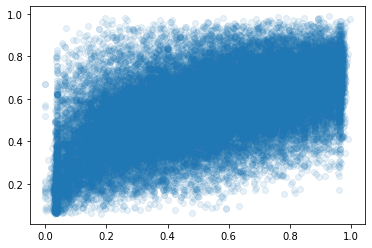

In [10]:
# scatterplot todas las decadas
x = df_general['valence']
y = df_general['danceability']
plt.scatter(x,y,alpha=0.1,)

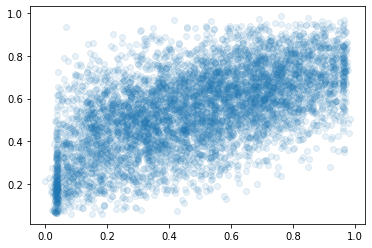

In [11]:
# scatterplot decada 2000
x = df_general.loc[df_general['decade']==2000,['valence']]
y = df_general.loc[df_general['decade']==2000,['danceability']]
plt.scatter(x,y,alpha=0.1)

In [12]:
#columnas de los datasets
df_general.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'decade'],
      dtype='object')

In [13]:
#tipos de los datos en los dataframes
df_general.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
decade                int64
dtype: object

danceability: qué tan facil de bailar es una canción

energy: qué tan energética es una canción

loudness: qué tanto volumen en decibeles tiene una canción

speechiness: qué tanto una canción está centrada en la parte hablada

acousticness: qué tan probable es que una canción se haya grabado con instrumentos acústicos

instrumentalness: qué tan instrumental es una canción

liveness: qué tan probable es que una canción sea una grabación en vivo

valence: positividad de una canción o estado de ánimo

tempo: tempo de la canción medido en beats por minuto - bpm

duration_ms: duración de la canción en milisegundos

time_signature: (compás) cuántos tiempos hay en cada compás de la canción

sections: la cantidad de variaciones en la estructura de una canción

target: si una canción fue un éxito en reproducciones (1) o no (0)


In [14]:
# análisis / imputación de valores nulos
# se ven los valores nulos 
df_general.isnull().sum() # no hay valores nulos 

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decade              0
dtype: int64

<AxesSubplot:>

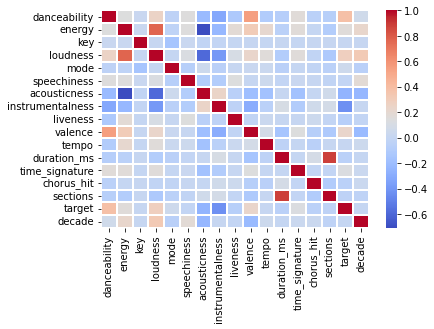

In [15]:
#relación entre las variables
sns.heatmap(round(df_general.corr(),2),fmt='.2f',linewidths=2, cmap="coolwarm",)

Observamos que los parámetros que tienen mayor correlación positiva con target son: danceability, loudness y valence. Mientras que instrumentalness es el parametro con mayor correlación negativa.

<AxesSubplot:>

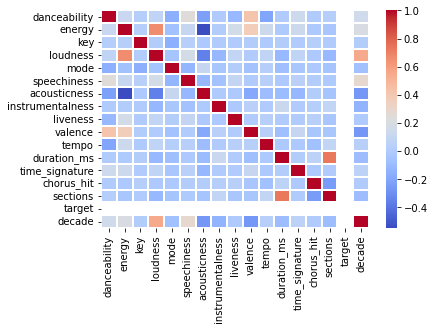

In [16]:
#correlacion con los hits
sns.heatmap(round(df_general_hits.corr(),2),fmt='.2f',linewidths=2, cmap="coolwarm",)

#Las mejores correlaciones positivas de hits son 
#    duration_ms/section, 
#    loudness/energy, 
#    loudness/decade
#    danceability/valence

#Las mejores correlaciones negativas de hits son 
#    acousticness/energy
#    loudness/accousticness

<AxesSubplot:>

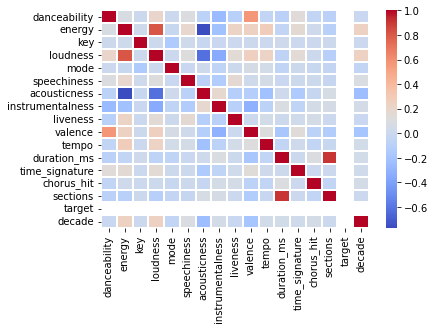

In [17]:
#correlacion de los no hits
sns.heatmap(round(df_general_no_hits.corr(),2),fmt='.2f',linewidths=2, cmap="coolwarm",)

#las correlaciones son similares a las de los hits

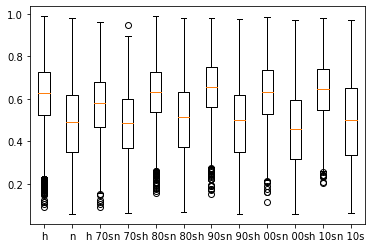

In [18]:
#analizaremos la distribución de bailabilidad de los hits de las decadas de los 70s hasta los 2010s
a = [
    df_general_hits['danceability'],df_general_no_hits['danceability'],
    hits_70s['danceability'],no_hits_70s['danceability'],
    hits_80s['danceability'],no_hits_80s['danceability'],
    hits_90s['danceability'],no_hits_90s['danceability'],
    hits_00s['danceability'],no_hits_00s['danceability'],
    hits_10s['danceability'],no_hits_10s['danceability']
]

bp = plt.boxplot(a,labels = ['h','n','h 70s','n 70s','h 80s','n 80s','h 90s','n 90s','h 00s','n 00s','h 10s','n 10s'], widths=0.4)

# hay outliers más visibles en las canciones de las décadas de los 70s, 80s y 90s

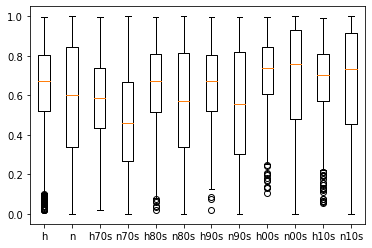

In [19]:
a = [df_general_hits['energy'],df_general_no_hits['energy'],
    hits_70s['energy'],no_hits_70s['energy'],
    hits_80s['energy'],no_hits_80s['energy'],
    hits_90s['energy'],no_hits_90s['energy'],
    hits_00s['energy'],no_hits_00s['energy'],
    hits_10s['energy'],no_hits_10s['energy']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)

#en general la media de los hits esta por encima, sin embargo en los 2000 y 2010 son un poco menores


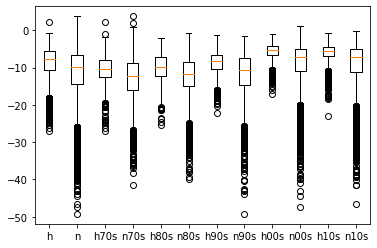

In [20]:
a = [df_general_hits['loudness'],df_general_no_hits['loudness'],
    hits_70s['loudness'],no_hits_70s['loudness'],
    hits_80s['loudness'],no_hits_80s['loudness'],
    hits_90s['loudness'],no_hits_90s['loudness'],
    hits_00s['loudness'],no_hits_00s['loudness'],
    hits_10s['loudness'],no_hits_10s['loudness']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)

#los hits son en general mas ruidosos

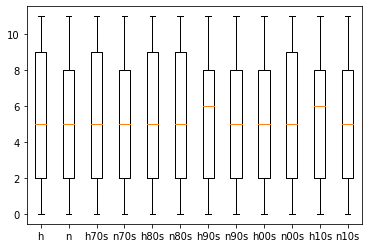

In [21]:
a = [df_general_hits['key'],df_general_no_hits['key'],
    hits_70s['key'],no_hits_70s['key'],
    hits_80s['key'],no_hits_80s['key'],
    hits_90s['key'],no_hits_90s['key'],
    hits_00s['key'],no_hits_00s['key'],
    hits_10s['key'],no_hits_10s['key']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)

#key no es relevante


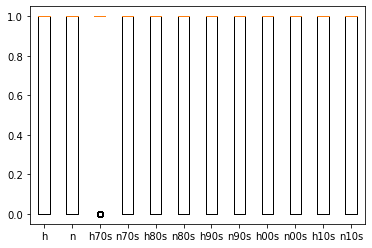

In [22]:
a = [df_general_hits['mode'],df_general_no_hits['mode'],
    hits_70s['mode'],no_hits_70s['mode'],
    hits_80s['mode'],no_hits_80s['mode'],
    hits_90s['mode'],no_hits_90s['mode'],
    hits_00s['mode'],no_hits_00s['mode'],
    hits_10s['mode'],no_hits_10s['mode']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)
#mode no es relevante

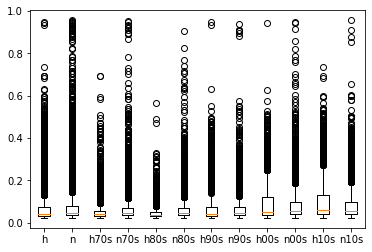

In [23]:
a = [df_general_hits['speechiness'],df_general_no_hits['speechiness'],
    hits_70s['speechiness'],no_hits_70s['speechiness'],
    hits_80s['speechiness'],no_hits_80s['speechiness'],
    hits_90s['speechiness'],no_hits_90s['speechiness'],
    hits_00s['speechiness'],no_hits_00s['speechiness'],
    hits_10s['speechiness'],no_hits_10s['speechiness']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)
#muchos outliers, speechiness no parece determinante


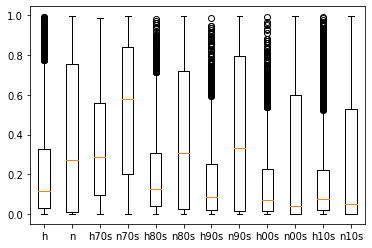

In [24]:
a = [df_general_hits['acousticness'],df_general_no_hits['acousticness'],
    hits_70s['acousticness'],no_hits_70s['acousticness'],
    hits_80s['acousticness'],no_hits_80s['acousticness'],
    hits_90s['acousticness'],no_hits_90s['acousticness'],
    hits_00s['acousticness'],no_hits_00s['acousticness'],
    hits_10s['acousticness'],no_hits_10s['acousticness']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)
#los hits son en general menos acusticos excepto en las ultimas 2 decadas.

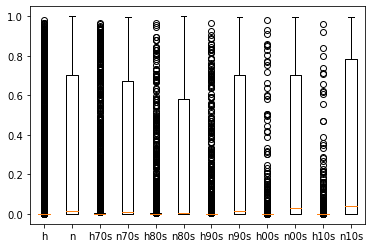

In [25]:
a = [df_general_hits['instrumentalness'],df_general_no_hits['instrumentalness'],
    hits_70s['instrumentalness'],no_hits_70s['instrumentalness'],
    hits_80s['instrumentalness'],no_hits_80s['instrumentalness'],
    hits_90s['instrumentalness'],no_hits_90s['instrumentalness'],
    hits_00s['instrumentalness'],no_hits_00s['instrumentalness'],
    hits_10s['instrumentalness'],no_hits_10s['instrumentalness']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)
#instrumentalness no relevante

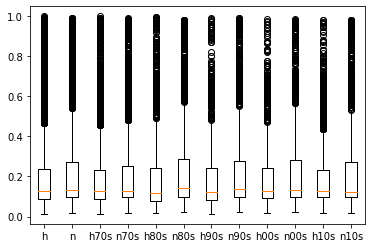

In [26]:
a = [df_general_hits['liveness'],df_general_no_hits['liveness'],
    hits_70s['liveness'],no_hits_70s['liveness'],
    hits_80s['liveness'],no_hits_80s['liveness'],
    hits_90s['liveness'],no_hits_90s['liveness'],
    hits_00s['liveness'],no_hits_00s['liveness'],
    hits_10s['liveness'],no_hits_10s['liveness']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)
#liveness no relevante


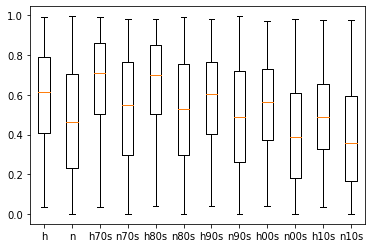

In [27]:
a = [df_general_hits['valence'],df_general_no_hits['valence'],
    hits_70s['valence'],no_hits_70s['valence'],
    hits_80s['valence'],no_hits_80s['valence'],
    hits_90s['valence'],no_hits_90s['valence'],
    hits_00s['valence'],no_hits_00s['valence'],
    hits_10s['valence'],no_hits_10s['valence']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)
#valence en los hits suele ser mas alta


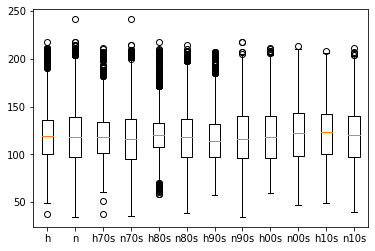

In [28]:
a = [df_general_hits['tempo'],df_general_no_hits['tempo'],
    hits_70s['tempo'],no_hits_70s['tempo'],
    hits_80s['tempo'],no_hits_80s['tempo'],
    hits_90s['tempo'],no_hits_90s['tempo'],
    hits_00s['tempo'],no_hits_00s['tempo'],
    hits_10s['tempo'],no_hits_10s['tempo']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)
#tempo no relevante

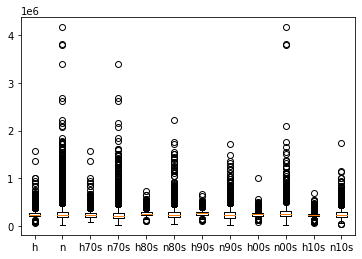

In [29]:
a = [df_general_hits['duration_ms'],df_general_no_hits['duration_ms'],
    hits_70s['duration_ms'],no_hits_70s['duration_ms'],
    hits_80s['duration_ms'],no_hits_80s['duration_ms'],
    hits_90s['duration_ms'],no_hits_90s['duration_ms'],
    hits_00s['duration_ms'],no_hits_00s['duration_ms'],
    hits_10s['duration_ms'],no_hits_10s['duration_ms']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)
#duration_ms no relevante

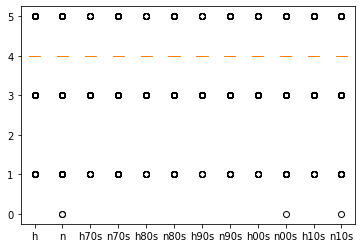

In [30]:
a = [df_general_hits['time_signature'],df_general_no_hits['time_signature'],
    hits_70s['time_signature'],no_hits_70s['time_signature'],
    hits_80s['time_signature'],no_hits_80s['time_signature'],
    hits_90s['time_signature'],no_hits_90s['time_signature'],
    hits_00s['time_signature'],no_hits_00s['time_signature'],
    hits_10s['time_signature'],no_hits_10s['time_signature']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)
#time_signature no relevante

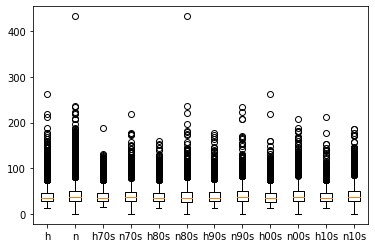

In [31]:
a = [df_general_hits['chorus_hit'],df_general_no_hits['chorus_hit'],
    hits_70s['chorus_hit'],no_hits_70s['chorus_hit'],
    hits_80s['chorus_hit'],no_hits_80s['chorus_hit'],
    hits_90s['chorus_hit'],no_hits_90s['chorus_hit'],
    hits_00s['chorus_hit'],no_hits_00s['chorus_hit'],
    hits_10s['chorus_hit'],no_hits_10s['chorus_hit']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)
#chorus_hit no relevante

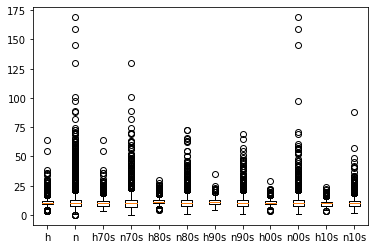

In [32]:
a = [df_general_hits['sections'],df_general_no_hits['sections'],
    hits_70s['sections'],no_hits_70s['sections'],
    hits_80s['sections'],no_hits_80s['sections'],
    hits_90s['sections'],no_hits_90s['sections'],
    hits_00s['sections'],no_hits_00s['sections'],
    hits_10s['sections'],no_hits_10s['sections']
]

bp = plt.boxplot(a,labels = ['h','n','h70s','n70s','h80s','n80s','h90s','n90s','h00s','n00s','h10s','n10s'],widths=0.4)
#sections no relevante

In [33]:
#Los campos mas relevantes son:
#danceability
#energy
#loudness
#acousticness
#valence

Buscando correlaciones

Analizando la biabilidad

In [34]:
df_general_hits['danceability'].mean()
#los hits tienen una media de 0.64 de bailabilidad (dentro de los hits hay más canciones bailables)

0.620045946278955

In [35]:
df_general_no_hits['danceability'].mean()

0.4846470551996057

(array([   5.,   27.,   81.,  204.,  317.,  495.,  798., 1092., 1513.,
        1955., 2147., 2112., 1977., 1470., 1023.,  623.,  300.,   93.]),
 array([0.0908    , 0.14064444, 0.19048889, 0.24033333, 0.29017778,
        0.34002222, 0.38986667, 0.43971111, 0.48955556, 0.5394    ,
        0.58924444, 0.63908889, 0.68893333, 0.73877778, 0.78862222,
        0.83846667, 0.88831111, 0.93815556, 0.988     ]),
 <BarContainer object of 18 artists>)

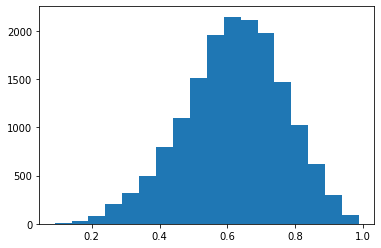

In [36]:
plt.hist(df_general_hits['danceability'], bins = 18)

(array([ 212.,  368.,  764.,  839.,  980., 1267., 1332., 1574., 1686.,
        1670., 1532., 1343., 1008.,  710.,  503.,  295.,  113.,   36.]),
 array([0.0576    , 0.10873333, 0.15986667, 0.211     , 0.26213333,
        0.31326667, 0.3644    , 0.41553333, 0.46666667, 0.5178    ,
        0.56893333, 0.62006667, 0.6712    , 0.72233333, 0.77346667,
        0.8246    , 0.87573333, 0.92686667, 0.978     ]),
 <BarContainer object of 18 artists>)

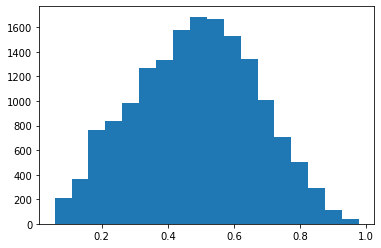

In [37]:
plt.hist(df_general_no_hits['danceability'], bins = 18)

In [38]:
df_general_hits['danceability'].value_counts(bins = 5)

(0.629, 0.809]                 6469
(0.45, 0.629]                  6082
(0.27, 0.45]                   1893
(0.809, 0.988]                 1560
(0.08889999999999999, 0.27]     228
Name: danceability, dtype: int64

La mayoría de éxitos tienen una bailabilidad que va desde 0.629 a 0.809 (bailabilidad alta)

In [39]:
df_general_no_hits['danceability'].value_counts(bins = 5)

(0.426, 0.61]      5870
(0.242, 0.426]     4226
(0.61, 0.794]      3601
(0.0557, 0.242]    1820
(0.794, 0.978]      715
Name: danceability, dtype: int64

Las canciones no hits tienen una bailabilidad menor

(array([  24.,   30.,   85.,  166.,  299.,  466.,  654.,  941., 1049.,
        1306., 1387., 1607., 1743., 1636., 1718., 1485., 1161.,  475.]),
 array([0.0204    , 0.07465556, 0.12891111, 0.18316667, 0.23742222,
        0.29167778, 0.34593333, 0.40018889, 0.45444444, 0.5087    ,
        0.56295556, 0.61721111, 0.67146667, 0.72572222, 0.77997778,
        0.83423333, 0.88848889, 0.94274444, 0.997     ]),
 <BarContainer object of 18 artists>)

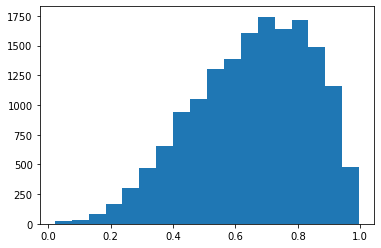

In [40]:
x = df_general_hits['energy']

plt.hist(x, bins = 18)

Los hits tienen una energía entre 0,6 y 0,8

(array([ 668.,  580.,  601.,  666.,  697.,  767.,  790.,  830.,  960.,
         836.,  894.,  884.,  926.,  929.,  912., 1105., 1429., 1758.]),
 array([2.51000000e-04, 5.57926111e-02, 1.11334222e-01, 1.66875833e-01,
        2.22417444e-01, 2.77959056e-01, 3.33500667e-01, 3.89042278e-01,
        4.44583889e-01, 5.00125500e-01, 5.55667111e-01, 6.11208722e-01,
        6.66750333e-01, 7.22291944e-01, 7.77833556e-01, 8.33375167e-01,
        8.88916778e-01, 9.44458389e-01, 1.00000000e+00]),
 <BarContainer object of 18 artists>)

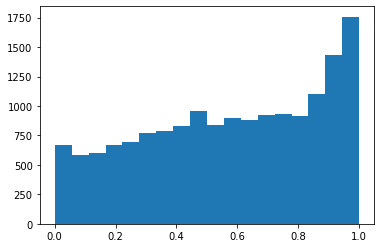

In [41]:
x = df_general_no_hits['energy']

plt.hist(x, bins = 18)

Los&nbsp;no&nbsp;hits&nbsp;tienen&nbsp;energía&nbsp;entre&nbsp;0,8&nbsp;y&nbsp;1

Análisis de la valencia

(array([ 119.,  272.,  486.,  614.,  795.,  808.,  909.,  920.,  970.,
        1142., 1164., 1195., 1216., 1271., 1163., 1111., 1074., 1003.]),
 array([0.0352    , 0.08824444, 0.14128889, 0.19433333, 0.24737778,
        0.30042222, 0.35346667, 0.40651111, 0.45955556, 0.5126    ,
        0.56564444, 0.61868889, 0.67173333, 0.72477778, 0.77782222,
        0.83086667, 0.88391111, 0.93695556, 0.99      ]),
 <BarContainer object of 18 artists>)

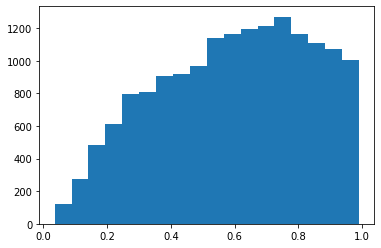

In [42]:
x = df_general_hits['valence']

plt.hist(x, bins = 18)

(array([1049.,  942.,  919.,  950.,  926.,  939., 1009.,  982.,  955.,
        1027.,  931.,  883.,  918.,  872.,  792.,  746.,  739.,  653.]),
 array([0.        , 0.05533333, 0.11066667, 0.166     , 0.22133333,
        0.27666667, 0.332     , 0.38733333, 0.44266667, 0.498     ,
        0.55333333, 0.60866667, 0.664     , 0.71933333, 0.77466667,
        0.83      , 0.88533333, 0.94066667, 0.996     ]),
 <BarContainer object of 18 artists>)

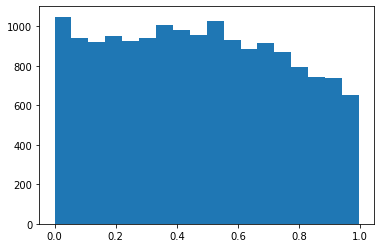

In [43]:
x = df_general_no_hits['valence']

plt.hist(x, bins = 18)

Analisis de acousticness

(array([2178., 1087.,  783.,  660.,  585.,  542.,  460.,  414.,  397.,
         380.,  351.,  347.,  262.,  267.,  208.,  248.,  200.,  236.,
         220.,  225.,  198.,  195.,  180.,  174.,  183.,  190.,  173.,
         133.,  137.,  139.,  138.,  148.,  128.,  125.,  135.,  114.,
         102.,  116.,  101.,   82.,  117.,  121.,  104.,  107.,   86.,
          94.,   99.,   87.,   91.,   67.,   80.,   65.,   69.,   76.,
          71.,   87.,   86.,   80.,   83.,   56.,   66.,   69.,   61.,
          71.,   71.,   61.,   60.,   58.,   66.,   55.,   46.,   37.,
          49.,   57.,   70.,   46.,   30.,   45.,   32.,   41.,   41.,
          30.,   32.,   33.,   39.,   29.,   33.,   29.,   27.,   27.,
          28.,   19.,   20.,   16.,   15.,   21.,   16.,    9.,    4.,
           6.]),
 array([2.32000000e-06, 9.94229680e-03, 1.98822736e-02, 2.98222504e-02,
        3.97622272e-02, 4.97022040e-02, 5.96421808e-02, 6.95821576e-02,
        7.95221344e-02, 8.94621112e-02, 9.94020880e-02, 1.

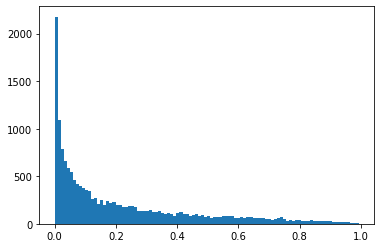

In [44]:
x = df_general_hits['acousticness']

plt.hist(x, bins = 100, ) #range=[0,0.05]

(array([4020.,  626.,  365.,  294.,  236.,  210.,  189.,  184.,  143.,
         112.,  140.,  108.,  129.,  117.,   99.,  107.,  115.,   99.,
          78.,   97.,  114.,   90.,   86.,   95.,   81.,   88.,   79.,
          93.,   81.,   91.,   65.,   74.,   85.,  101.,   70.,   78.,
          77.,   78.,   77.,   92.,   65.,   81.,   63.,   70.,   87.,
          65.,   88.,   65.,   70.,   84.,   78.,   75.,   84.,   90.,
          88.,   76.,   80.,   80.,   81.,   86.,   80.,   81.,   96.,
          91.,   86.,   89.,   72.,   87.,  100.,  103.,   95.,   89.,
         103.,   91.,   88.,  109.,  115.,  131.,  109.,  113.,  104.,
         122.,  121.,  101.,  147.,  105.,  126.,  112.,  134.,  150.,
         172.,  169.,  175.,  168.,  196.,  192.,  220.,  244.,  311.,
         516.]),
 array([0.     , 0.00996, 0.01992, 0.02988, 0.03984, 0.0498 , 0.05976,
        0.06972, 0.07968, 0.08964, 0.0996 , 0.10956, 0.11952, 0.12948,
        0.13944, 0.1494 , 0.15936, 0.16932, 0.17928, 0.18924

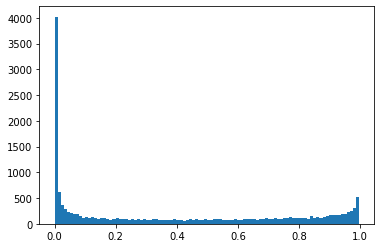

In [45]:
x = df_general_no_hits['acousticness']

plt.hist(x, bins = 100, ) #range=[0,0.05]

Análisis del volumen

(array([   7.,    5.,    9.,   24.,   58.,  160.,  304.,  615.,  979.,
        1307., 1623., 1925., 2336., 2736., 2485., 1394.,  240.,   20.]),
 array([-25.        , -23.61111111, -22.22222222, -20.83333333,
        -19.44444444, -18.05555556, -16.66666667, -15.27777778,
        -13.88888889, -12.5       , -11.11111111,  -9.72222222,
         -8.33333333,  -6.94444444,  -5.55555556,  -4.16666667,
         -2.77777778,  -1.38888889,   0.        ]),
 <BarContainer object of 18 artists>)

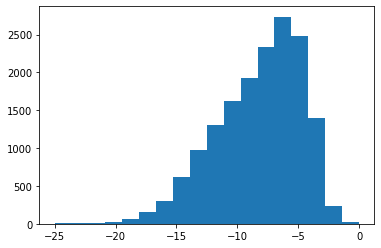

In [46]:
plt.hist(df_general_hits['loudness'], bins = 18, range = [-25,0])

(array([ 172.,  249.,  265.,  338.,  432.,  584.,  768.,  994., 1162.,
        1385., 1423., 1591., 1810., 1738., 1579.,  873.,  213.,   35.]),
 array([-25.        , -23.61111111, -22.22222222, -20.83333333,
        -19.44444444, -18.05555556, -16.66666667, -15.27777778,
        -13.88888889, -12.5       , -11.11111111,  -9.72222222,
         -8.33333333,  -6.94444444,  -5.55555556,  -4.16666667,
         -2.77777778,  -1.38888889,   0.        ]),
 <BarContainer object of 18 artists>)

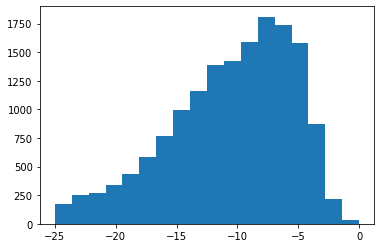

In [47]:
plt.hist(df_general_no_hits['loudness'], bins = 18, range = [-25,0])

In [48]:
df_general['loudness'].mean()

-9.740177488910792

Tienen volumenes parecidos pero los no hits llegan a volumenes bajos

Text(0.5, 1.0, 'media de bailabilidad de las canciones durante los años')

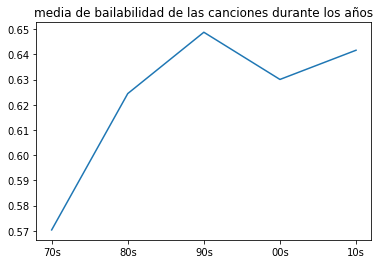

In [49]:
media_dance70 = hits_70s['danceability'].mean()
media_dance80 = hits_80s['danceability'].mean()
media_dance90 = hits_90s['danceability'].mean()
media_dance00 = hits_00s['danceability'].mean()
media_dance10 = hits_10s['danceability'].mean()

y = [media_dance70,media_dance80, media_dance90, media_dance00, media_dance10]
x = ['70s','80s','90s','00s','10s']
plt.plot(x,y)
plt.title("media de bailabilidad de las canciones durante los años")

Text(0.5, 1.0, 'media de volumen de las canciones durante los años')

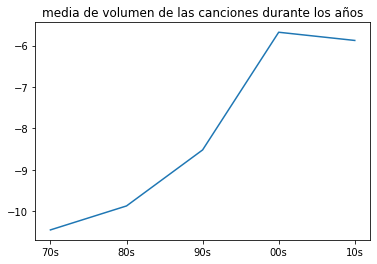

In [50]:
media_dance70 = hits_70s['loudness'].mean()
media_dance80 = hits_80s['loudness'].mean()
media_dance90 = hits_90s['loudness'].mean()
media_dance00 = hits_00s['loudness'].mean()
media_dance10 = hits_10s['loudness'].mean()

y = [media_dance70,media_dance80, media_dance90, media_dance00, media_dance10]
x = ['70s','80s','90s','00s','10s']
plt.plot(x,y)
plt.title("media de volumen de las canciones durante los años")

Text(0.5, 1.0, 'media de duración de los hits en segundos a través del tiempo')

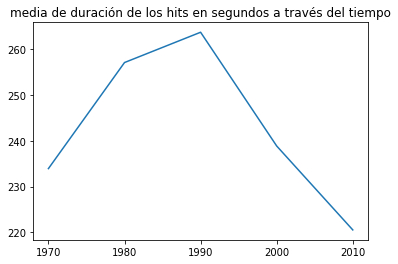

In [51]:

a= np.array([df_general_hits.loc[df_general_hits['decade']==1970,['duration_ms']].mean(),
df_general_hits.loc[df_general_hits['decade']==1980,['duration_ms']].mean(),
df_general_hits.loc[df_general_hits['decade']==1990,['duration_ms']].mean(),
df_general_hits.loc[df_general_hits['decade']==2000,['duration_ms']].mean(),
df_general_hits.loc[df_general_hits['decade']==2010,['duration_ms']].mean()])



plt.plot(['1970','1980','1990','2000','2010'],a/1000)
plt.title("media de duración de los hits en segundos a través del tiempo")

Text(0.5, 1.0, 'media de valence de los hits a través del tiempo')

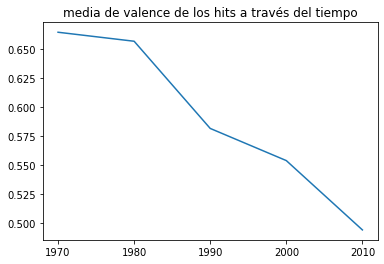

In [52]:
a= np.array([df_general_hits.loc[df_general_hits['decade']==1970,['valence']].mean(),
df_general_hits.loc[df_general_hits['decade']==1980,['valence']].mean(),
df_general_hits.loc[df_general_hits['decade']==1990,['valence']].mean(),
df_general_hits.loc[df_general_hits['decade']==2000,['valence']].mean(),
df_general_hits.loc[df_general_hits['decade']==2010,['valence']].mean()])



plt.plot(['1970','1980','1990','2000','2010'],a)
plt.title("media de valence de los hits a través del tiempo")

Text(0.5, 1.0, 'media de la acusticidad de los hits a través del tiempo')

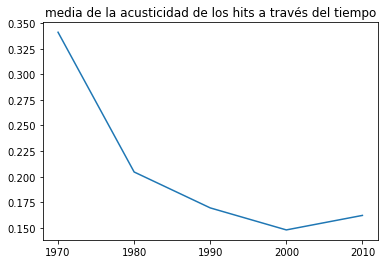

In [53]:
a= np.array([df_general_hits.loc[df_general_hits['decade']==1970,['acousticness']].mean(),
df_general_hits.loc[df_general_hits['decade']==1980,['acousticness']].mean(),
df_general_hits.loc[df_general_hits['decade']==1990,['acousticness']].mean(),
df_general_hits.loc[df_general_hits['decade']==2000,['acousticness']].mean(),
df_general_hits.loc[df_general_hits['decade']==2010,['acousticness']].mean()])



plt.plot(['1970','1980','1990','2000','2010'],a)
plt.title("media de la acusticidad de los hits a través del tiempo")

Text(0.5, 1.0, 'media de sections de los hits a través del tiempo')

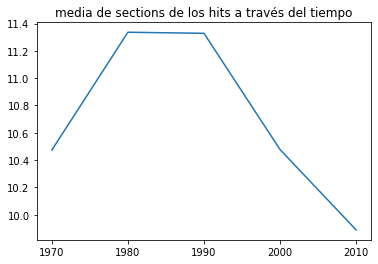

In [54]:
a= np.array([df_general_hits.loc[df_general_hits['decade']==1970,['sections']].mean(),
df_general_hits.loc[df_general_hits['decade']==1980,['sections']].mean(),
df_general_hits.loc[df_general_hits['decade']==1990,['sections']].mean(),
df_general_hits.loc[df_general_hits['decade']==2000,['sections']].mean(),
df_general_hits.loc[df_general_hits['decade']==2010,['sections']].mean()])



plt.plot(['1970','1980','1990','2000','2010'],a)
plt.title("media de sections de los hits a través del tiempo")

Bloxpot y outliers(valores extremos)

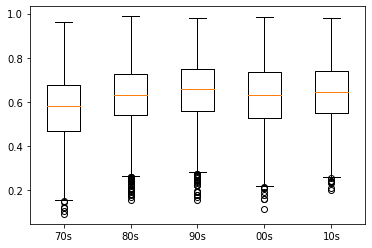

In [55]:
#analizaremos la distribución de bailabilidad de los hits de las decadas de los 70s hasta los 2010s
a = [hits_70s['danceability'],hits_80s['danceability'],hits_90s['danceability'],hits_00s['danceability'],hits_10s['danceability']]

bp = plt.boxplot(a,labels = ['70s','80s','90s','00s','10s'])

# hay outliers más visibles en las canciones de las décadas de los 70s, 80s y 90s

La bailabilidad es el parámetro más correlacionado al éxito de una canción, pero también encontramos varios outliers, tomaremos el dataset de los "2010s" para encontrar los outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91aef91a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91aef9a0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91aef91710>],
 'medians': [<matplotlib.lines.Line2D at 0x7f91aef9a790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91aef9aad0>],
 'means': []}

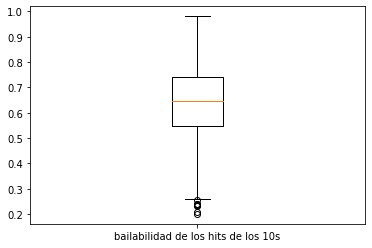

In [56]:
a = [hits_10s['danceability']]
plt.boxplot(a,labels = ['bailabilidad de los hits de los 10s'])

#observamos outliers en el boxplot

Tomamos como outliers los valores que están debajo del whisker inferior

In [57]:

hits_10s['danceability'].describe() # obtenemos como Q1(primer cuartil):0.547 y como Q3(tercer quartil): 0.741 en el boxplot
iqr00 = 0.741 - 0.547 # rango entre cuartiles
whisker_bot = 0.547 - (1.5 * iqr00) # whisker inferior


hits_10s.loc[hits_10s['danceability'] < whisker_bot,['track','artist','danceability','valence']] 

,track,artist,danceability,valence
712,Everytime,Ariana Grande,0.239,0.1980
725,Every Breath You Take,Hannah Huston,0.237,0.0923
1108,It's The Most Wonderful Time Of The Year,Andy Williams,0.240,0.7760
1274,Walk,Foo Fighters,0.231,0.1910
2683,Already Gone,Kelly Clarkson,0.209,0.2940
3414,I Dreamed A Dream,Anne Hathaway,0.256,0.1460
3901,Video Games,Lana Del Rey,0.236,0.1810
5180,Forever Country,"Artists Of Then, Now & Forever",0.201,0.1310


# Modelo

In [58]:
#para nuestro modelo nos vamos a basar en los atributos relevantes
#'danceability', 'energy','acousticness', 'loudness', 'valence', 'decade'

df_general.loc[df_general['target']==1, ['danceability', 'energy','acousticness', 'loudness', 'valence', 'decade']]

,danceability,energy,acousticness,loudness,valence,decade
4,0.440,0.376,0.3480,-10.939,0.358,1970
6,0.676,0.463,0.3090,-13.155,0.910,1970
7,0.249,0.261,0.9620,-10.592,0.195,1970
8,0.663,0.822,0.1990,-13.119,0.818,1970
9,0.522,0.440,0.4340,-13.258,0.295,1970
...,...,...,...,...,...,...
6390,0.655,0.632,0.0189,-4.802,0.447,2010
6391,0.612,0.807,0.0495,-2.810,0.398,2010
6392,0.780,0.784,0.0447,-5.039,0.430,2010
6394,0.910,0.366,0.0996,-9.954,0.740,2010


In [59]:
#decade va a servir como variable categorica
#vamos a separar los datasets como vienen de origen y dependiendo la decada usar el modelo mejor entrenado

In [60]:
#separacion en arrays de entrenamiento
train_cols = ['decade','danceability', 'energy',
       'acousticness', 'loudness', 'valence' ]

X = df_general[train_cols]
y = df_general['target']

X70 = df_general.loc[df_general.decade == 1970, train_cols]
y70 = df_general.loc[df_general.decade == 1970, ['target']]
X80 = df_general.loc[df_general.decade == 1980, train_cols]
y80 = df_general.loc[df_general.decade == 1980, ['target']]
X90 = df_general.loc[df_general.decade == 1990, train_cols]
y90 = df_general.loc[df_general.decade == 1990, ['target']]
X00 = df_general.loc[df_general.decade == 2000, train_cols]
y00 = df_general.loc[df_general.decade == 2000, ['target']]
X10 = df_general.loc[df_general.decade == 2010, train_cols]
y10 = df_general.loc[df_general.decade == 2010, ['target']]

#a continuación mostramos todos los arboles de decision separados por decada
#entendemos que los arboles de decisión en alguna de sus variantes es el indicado para nuestro modelo

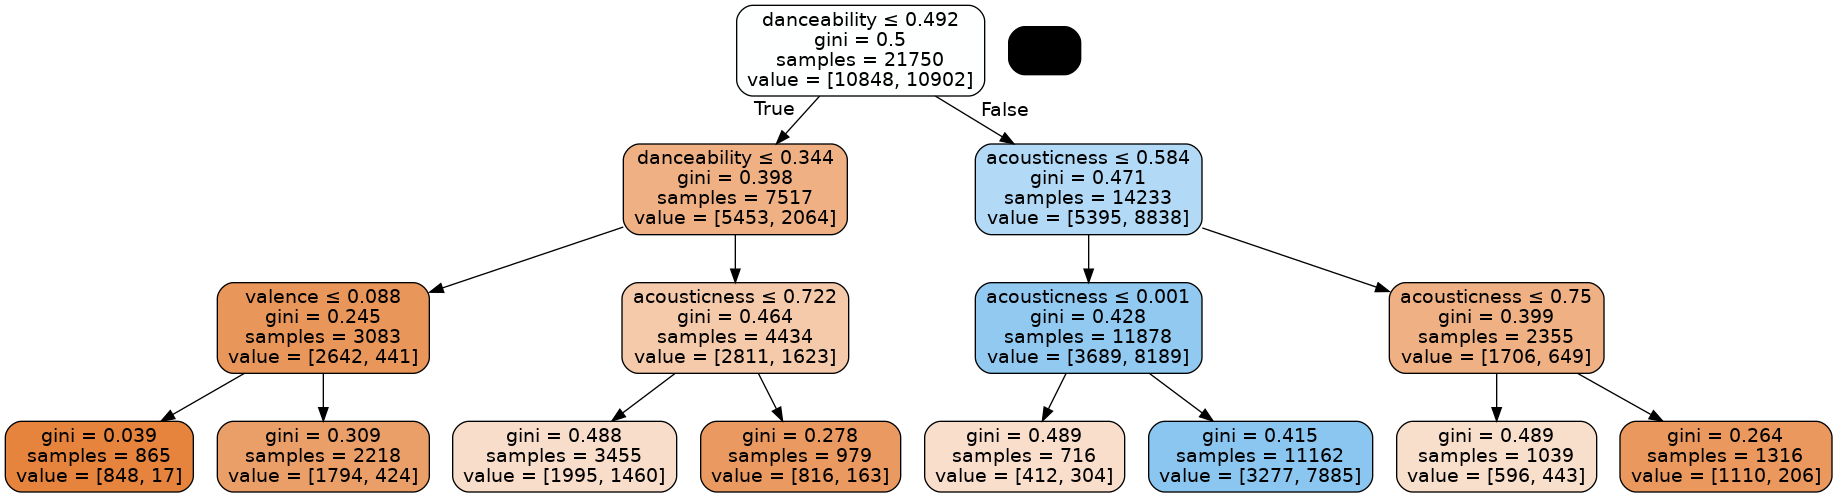

In [61]:
#todo
from sklearn.model_selection import train_test_split
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train_A,y_train_A)

from sklearn.tree import export_graphviz
from IPython.display import Image
# Visualizar el árbol usando graphviz
dot_data = export_graphviz(dtc, out_file=None,  
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

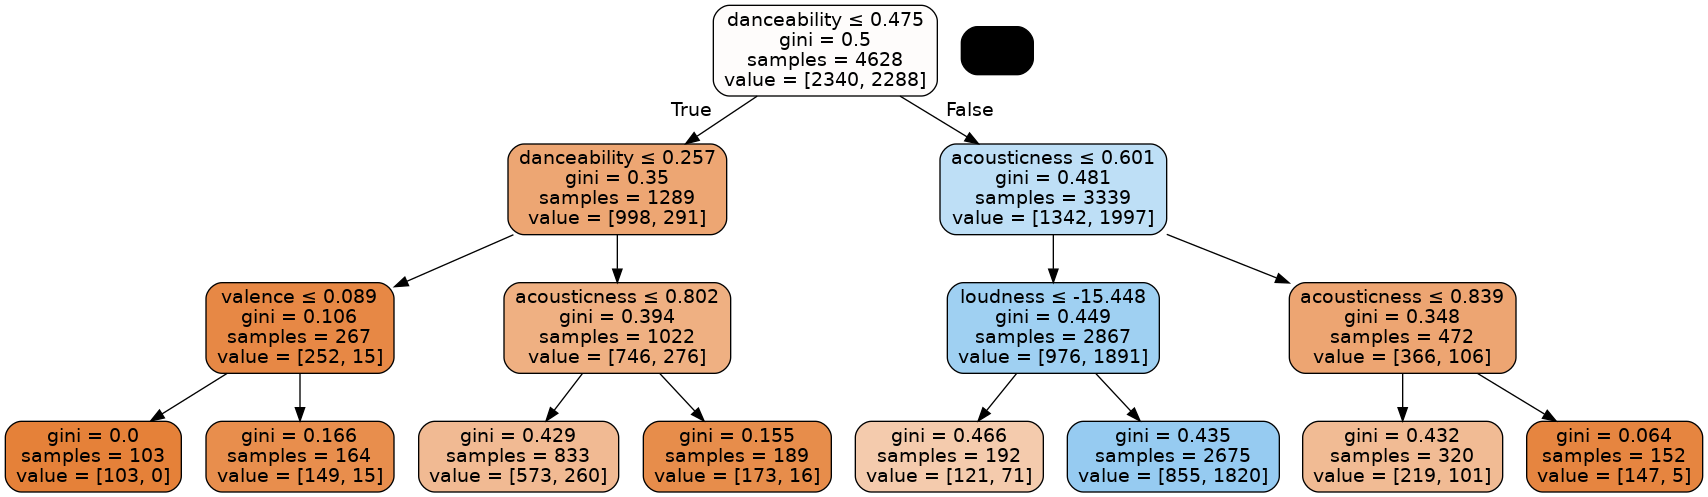

In [62]:
#80
from sklearn.model_selection import train_test_split
X_train80, X_test80, y_train80, y_test80 = train_test_split(X80, y80, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train80,y_train80)

from sklearn.tree import export_graphviz
from IPython.display import Image
# Visualizar el árbol usando graphviz
dot_data = export_graphviz(dtc, out_file=None,  
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

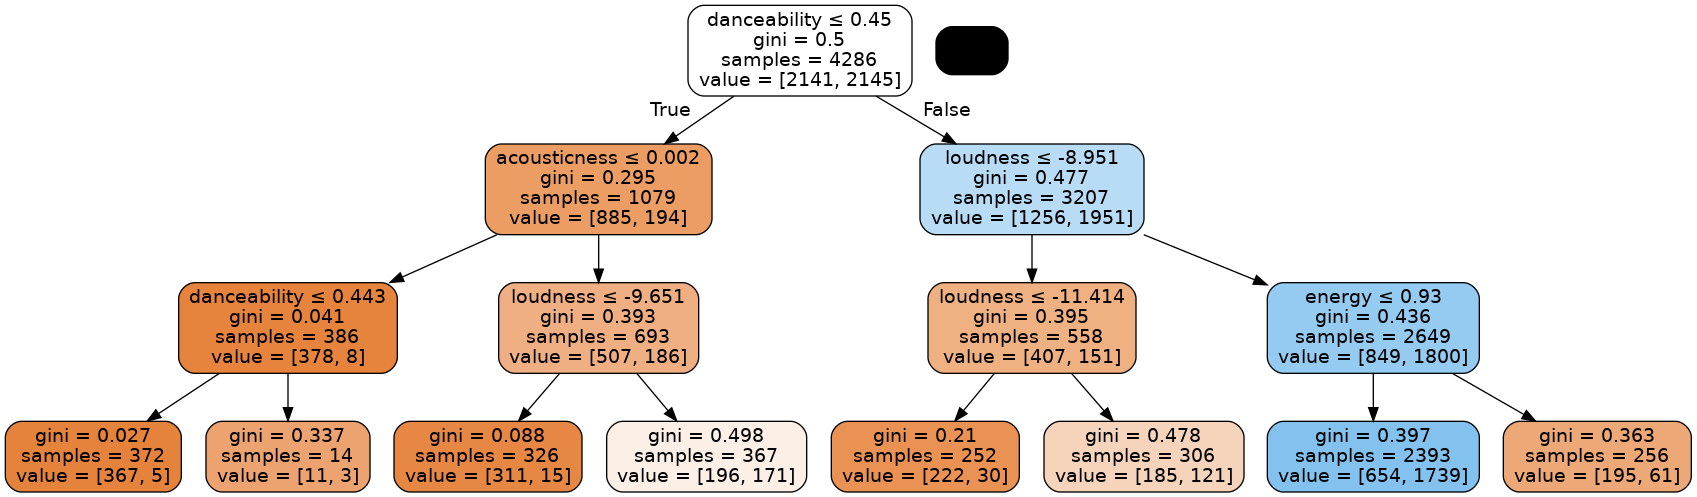

In [63]:
#10
from sklearn.model_selection import train_test_split
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train10,y_train10)

from sklearn.tree import export_graphviz
from IPython.display import Image
# Visualizar el árbol usando graphviz
dot_data = export_graphviz(dtc, out_file=None,  
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

In [64]:
#vamos a realizar las diferentes evaluaciones de los modelos
from sklearn.model_selection import cross_val_score,StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, RandomForestRegressor

cv = KFold(n_splits=3, random_state=41, shuffle=True)

#funcion de rendimiento de precisión
#es mas util utilizar precision en los casos que se busca la clase positiva, en nuestro caso el HIT
def evaluar_rendimiento(modelo, xTrain, yTrain, nombre):
    s = cross_val_score(modelo, xTrain, yTrain, cv=cv, n_jobs=-1,scoring='precision')
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

#algoritmos a probar
clf = LogisticRegression(C=1e10)
dt = DecisionTreeClassifier(class_weight='balanced')
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced',)
et = ExtraTreesClassifier(class_weight='balanced')


In [65]:
#todo el dataset

print("todo el dataset")
evaluar_rendimiento(clf, X_train_A,y_train_A, "Regresión Lógistica")
evaluar_rendimiento(dt,  X_train_A,y_train_A, "Árbol de decisión")
evaluar_rendimiento(bdt, X_train_A,y_train_A, "Bagging AD")
evaluar_rendimiento(rf,  X_train_A,y_train_A, "Random Forest")
evaluar_rendimiento(et,  X_train_A,y_train_A, "Extra Trees")

#80s
print("80s")
evaluar_rendimiento(clf, X_train80,y_train80, "Regresión Lógistica")
evaluar_rendimiento(dt,  X_train80,y_train80, "Árbol de decisión")
evaluar_rendimiento(bdt, X_train80,y_train80, "Bagging AD")
evaluar_rendimiento(rf,  X_train80,y_train80, "Random Forest")
evaluar_rendimiento(et,  X_train80,y_train80, "Extra Trees")

#10s
print("10s")
evaluar_rendimiento(clf, X_train10,y_train10, "Regresión Lógistica")
evaluar_rendimiento(dt,  X_train10,y_train10, "Árbol de decisión")
evaluar_rendimiento(bdt, X_train10,y_train10, "Bagging AD")
evaluar_rendimiento(rf,  X_train10,y_train10, "Random Forest")
evaluar_rendimiento(et,  X_train10,y_train10, "Extra Trees")

#Random Forest es el mas preciso


todo el dataset
Rendimiento de Regresión Lógistica:	0.692 ± 0.005
Rendimiento de Árbol de decisión:	0.68 ± 0.001
Rendimiento de Bagging AD:	0.739 ± 0.006
Rendimiento de Random Forest:	0.74 ± 0.008
Rendimiento de Extra Trees:	0.736 ± 0.008
80s
Rendimiento de Regresión Lógistica:	0.674 ± 0.02
Rendimiento de Árbol de decisión:	0.648 ± 0.021
Rendimiento de Bagging AD:	0.698 ± 0.018
Rendimiento de Random Forest:	0.714 ± 0.016
Rendimiento de Extra Trees:	0.706 ± 0.022
10s
Rendimiento de Regresión Lógistica:	0.735 ± 0.01
Rendimiento de Árbol de decisión:	0.73 ± 0.01
Rendimiento de Bagging AD:	0.778 ± 0.011
Rendimiento de Random Forest:	0.773 ± 0.008
Rendimiento de Extra Trees:	0.761 ± 0.008


In [66]:
#encontrar los mejores hiperparametros para el RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#definimos los parametros que nos interesan
param_grid = {'max_depth': [28,30,32,34], #3,5,10,20,25
             'n_estimators': [180,190,200,210,220], #[100, 200, 300]
             'max_features': ['auto',1]} #,1,2,3,4,5

grid = GridSearchCV(rf, param_grid=param_grid, cv=3, scoring='precision')

In [67]:
#probamos con todo el dataset
#grid.fit(X_train_A, y_train_A)
#el mejor estimador
be_rf = RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=1,n_estimators=220)#grid.best_estimator_
be_rf 
#El Mejor 
#1.RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=1,n_estimators=220)
#RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=1,n_estimators=200)
#RandomForestClassifier(class_weight='balanced', max_depth=28, n_estimators=180)


RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=1,
                       n_estimators=220)

In [68]:
#podemos ver como dieron los resultados con los diferentes parametros
#print(grid.cv_results_.get('rank_test_score'))
#grid.cv_results_.get('params')

In [69]:
# predecimos y obtenemos la calidad
from sklearn.metrics import (
    confusion_matrix,
    recall_score,
    roc_curve,
    auc,
    accuracy_score,
)
from sklearn.metrics import classification_report, precision_score

be_rf = RandomForestClassifier(class_weight='balanced', max_depth=34,n_estimators=200) #grid.best_estimator_#RandomForestClassifier(class_weight='balanced', max_depth=34,n_estimators=200)
be_rf.fit(X_train_A, y_train_A)

rf_pred_A = be_rf.predict(X_test_A)
print('accuracy_score', accuracy_score(y_test_A, rf_pred_A))
print('recall_score',recall_score(y_test_A, rf_pred_A))
print('precision_score',precision_score(y_test_A, rf_pred_A))

be_rf


accuracy_score 0.7619003173417958
recall_score 0.8020637898686679
precision_score 0.7407728296655692


RandomForestClassifier(class_weight='balanced', max_depth=34, n_estimators=200)

In [70]:
#probamos con 80s
grid80 = GridSearchCV(rf, param_grid=param_grid, cv=3, scoring='precision')
#grid80.fit(X_train80, y_train80.values.ravel())
#el mejor estimador
be_rf80 = RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=1,n_estimators=220) #grid80.best_estimator_
be_rf80

RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=1,
                       n_estimators=220)

In [71]:
be_rf80.fit(X_train80,y_train80.values.ravel())
rf_pred80 = be_rf80.predict(X_test80)
print(accuracy_score(y_test80,rf_pred80))
print(recall_score(y_test80,rf_pred80))
print(precision_score(y_test80,rf_pred80))
#peores valores que tomando todo el dataset entero.

0.7315789473684211
0.7675814751286449
0.7241100323624595


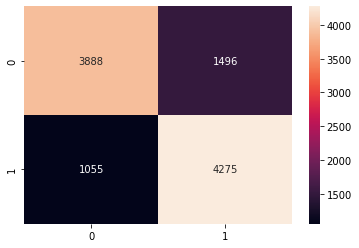

In [72]:
#matriz de confusion del mejor algoritmo
confusion = confusion_matrix(y_test_A, rf_pred_A)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()


#True Positives (TP): hemos predicho correctamente que la cancion es un hit (4292/10714) 40,06%
#True Negatives (TN): hemos predicho correctamente que la cancion no es  un hit (3890/10714) 36,307%
#False Positives (FP): hemos predicho que la cancion es un hit pero es falso (1494/10714) 13,945%
#False Negatives (FN): hemos predicho la cancion no es un hit pero es falso (1038/10714) 9,688%

#acertó en un 76,367%
#falló en un 23,633%

In [73]:
#entrenamiento con todas las variables del modelo.

train_cols_full = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'decade']

X_full = df_general[train_cols_full]
y_full = df_general['target']

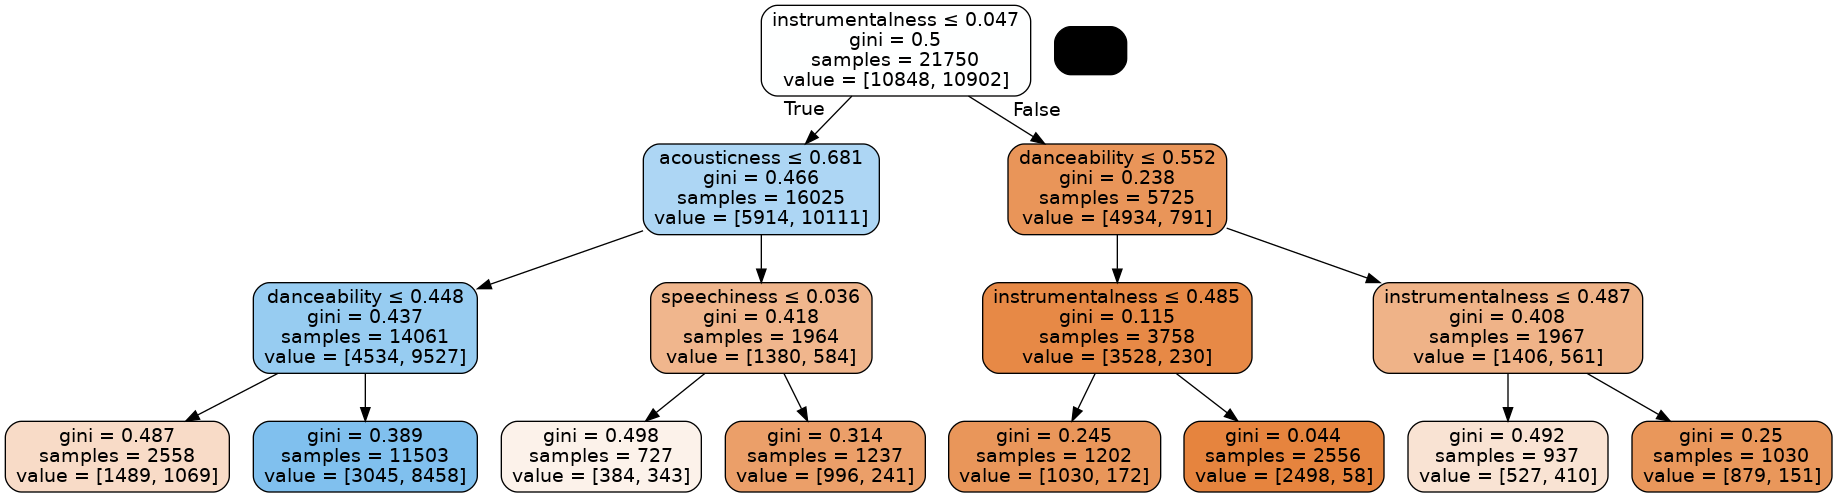

In [74]:
#probamos un arbol como los demas.

from sklearn.model_selection import train_test_split
X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(X_full, y_full, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train_F,y_train_F)

from sklearn.tree import export_graphviz
from IPython.display import Image
# Visualizar el árbol usando graphviz
dot_data = export_graphviz(dtc, out_file=None,  
                feature_names=X_train_F.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


In [75]:
df_general.loc[(df_general['instrumentalness'] <= 0.047) & (df_general['acousticness'] <= 0.681) & (df_general['danceability'] <= 0.448) & (df_general['target']==1),:].shape

(1605, 20)

In [78]:
#[0,1] 
#0 = no hit, 
#1 = hit
print(dtc.classes_)

[0 1]


In [79]:
#las mas importantes instrumentalness, danceability, acousticness, speechiness
#una la variable mas importante la dejamos afuera en los demas modelos (instrumentalness).
print(dtc.feature_importances_)
print(dtc.feature_names_in_)

[0.16829384 0.         0.         0.         0.         0.02145174
 0.15212133 0.65813309 0.         0.         0.         0.
 0.         0.         0.         0.        ]
['danceability' 'energy' 'key' 'loudness' 'mode' 'speechiness'
 'acousticness' 'instrumentalness' 'liveness' 'valence' 'tempo'
 'duration_ms' 'time_signature' 'chorus_hit' 'sections' 'decade']


In [80]:
#evaluamos rendimiento con todas las variables
evaluar_rendimiento(clf, X_full,y_full, "Regresión Lógistica")
evaluar_rendimiento(dt,  X_full,y_full, "Árbol de decisión")
evaluar_rendimiento(bdt, X_full,y_full, "Bagging AD")
evaluar_rendimiento(rf,  X_full,y_full, "Random Forest")
evaluar_rendimiento(et,  X_full,y_full, "Extra Trees")

Rendimiento de Regresión Lógistica:	0.533 ± 0.028
Rendimiento de Árbol de decisión:	0.733 ± 0.0
Rendimiento de Bagging AD:	0.795 ± 0.004
Rendimiento de Random Forest:	0.787 ± 0.003
Rendimiento de Extra Trees:	0.783 ± 0.005


In [81]:
#probamos el grid search con todas las variables
param_grid_f = {'max_depth': [20,25,30], #[28,30,32,34]
             'n_estimators': [100, 200, 300], #[180,190,200,210,220], #[100, 200, 300]
             'max_features': ['auto',1,2,3]} #,1,2,3,4,5

grid_F = GridSearchCV(rf, param_grid=param_grid_f, cv=3, scoring='precision')

In [82]:
#hgacemos el entrenamiento del dataset completo
#grid_F.fit(X_train_F, y_train_F)

In [83]:
#el mejor estimador
be_rf_f = RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=3)#grid_F.best_estimator_
be_rf_f 
#El Mejor 

RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=3)

In [84]:
#podemos ver como dieron los resultados con los diferentes parametros
#print(grid_F.cv_results_.get('rank_test_score'))
#grid_F.cv_results_.get('params')
be_rf_f.fit(X_train_F, y_train_F)

RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=3)

In [85]:
#se puede apreciar como es mejor utilizar todas las columnas para predecir
rf_pred_F = be_rf_f.predict(X_test_F)
print('accuracy_score', accuracy_score(y_test_F, rf_pred_F))
print('recall_score',recall_score(y_test_F, rf_pred_F))
print('precision_score',precision_score(y_test_F, rf_pred_F))

be_rf_f

accuracy_score 0.8128616763113683
recall_score 0.8536585365853658
precision_score 0.7878787878787878


RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=3)

In [86]:
#como se vio en el modelo de arbol. la variable mas importante es instrumentalness (0.16748074 ), 
#seguido de acousticness (0.11769644 ),
#y danceability (0.10842324 )

print(be_rf_f.feature_importances_)
print(be_rf_f.feature_names_in_)

[0.11210087 0.07769914 0.02607063 0.06937203 0.00799475 0.06102845
 0.11102357 0.16845112 0.04572948 0.06469938 0.04843905 0.08765927
 0.00657174 0.04405826 0.03645529 0.03264697]
['danceability' 'energy' 'key' 'loudness' 'mode' 'speechiness'
 'acousticness' 'instrumentalness' 'liveness' 'valence' 'tempo'
 'duration_ms' 'time_signature' 'chorus_hit' 'sections' 'decade']


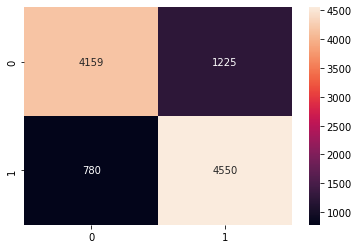

In [87]:
#matriz de confusion del mejor algoritmo tomando todas las columnas
confusion = confusion_matrix(y_test_F, rf_pred_F)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

#True Positives (TP): hemos predicho correctamente que la cancion es un hit (4572/10714) 42,67%
#True Negatives (TN): hemos predicho correctamente que la cancion no es  un hit (4159/10714) 38,82%
#False Positives (FP): hemos predicho que la cancion es un hit pero es falso (1225/10714) 11,43%
#False Negatives (FN): hemos predicho la cancion no es un hit pero es falso (758/10714) 7,08%

#acertó en un 81,49%
#falló en un 18,51%

#el modelo anterior
    #acertó en un 76,367%
    #falló en un 23,633%



# Baseline

Para determinar si una canción será o no un éxito encontramos que los parametros que están más correlacionadas con el éxito de una canción son la bailabilidad, la valencia, el volumen, la acustabilidad y la energia

Las canciones exitosa en reproducciones generalmente tienen una bailabilidad alta, en el dataset que analizamos (df_10s) obutvimos un promedio de 0.64 en bailabilidad por lo que en nuestro modelo la bailabilidad tendrá un peso importante favoreciendo a las canciones que tengan más alto este parametro o más cercano a la media. La bailabilidad se encuentra relacionada con la valencia o estado de ánimo de una canción, si bien existen hits que son canciones tristes, la mayoría tiene una valencia alta. En el caso de loudness, el volumen promedio está alrededor de -5.87 dB, aunque varía de acuerdo al género de la canción hay un estandar en la industria musical.
La energia generalmente se encuentra entre 0,6 y 0,8 en los hits, y en las canciones que no son hits, es mas probable encontrarla arriba de 0,8. Por ultimo la acusticidad es la menos relevante pero es más probable encontrar un tema hit acustico por debajo de 0.2, mientras que los que no son hits se encuentran por arriba de ese valor.


Con respecto a las demás variables encontramos las siguientes observaciones:

1. Instrumental, speechiness y liveness en los hits tienen un valor muy bajo, es decir las canciones tienen que ser menos instrumentales, más centradas en la voz cantada y no ser grabaciones en vivo
2. las canciones tienen que tener una duración media de 3 minutos y 40 segundos
3. las canciones más populares tienen un time signature de 4/4 porque son canciones más bailables






In [88]:
#predecir hit basado solo en el baseline
def predict_hit_baseline(danceability,energy, acousticness, valence):
    if danceability >= 0.64:
        return 1
    if energy >= 0.6 and energy < 0.8:
        return 1
    if danceability >= 0.49 and valence >= 0.8:
        return 1
    if acousticness < 0.2:
        return 1
    else:
        return 0

In [89]:
#baseline basado en nuestras predicciones con las columnas que creímos importantes del arbol
def predict_hit(danceability, energy,acousticness, loudness, valence):
    result = 0
    if danceability <= 0.492:
        result= 0 #gini 0.398
    else:
        if acousticness <= 0.584:
            if acousticness <= 0.001:
                result= 0 #gini 0.489
            else:
                result= 1 #gini 0.415
        else:
            result= 0 #gini 0.399
    
    return result


![Picture title](image-20220621-235759.png)

Total Rows: 32464
True Positive: 13556 => Relacion: 0.41757023164120255
True Negative: 5665 => Relacion: 0.17450098570724495
False Positive: 10567 => Relacion: 0.3254990142927551
False Negative: 2676 => Relacion: 0.08242976835879744
Accuracy:  0.5920712173484475
Recall:  0.8351404632824051
Precission:  0.5619533225552378


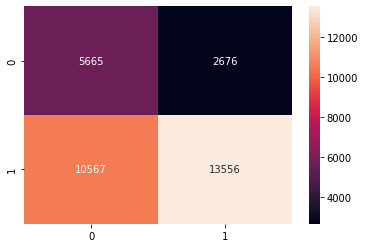

In [91]:
#validar baseline hits nuestro

t_pos = 0
t_neg = 0
f_pos = 0
f_neg = 0
total_rows = 0

for index, row in df_general.iterrows():
    result = predict_hit_baseline(row['danceability'],row['energy'],row['acousticness'],row['valence'])
    row_target = row['target']
    
    if row_target == 1 and result == 1:
        t_pos+= 1
    if row_target == 0 and result == 0:
        t_neg+= 1
    
    if row_target == 1 and result == 0:
        f_neg+= 1
    if row_target == 0 and result == 1:
        f_pos+= 1
    
    total_rows +=1

print('Total Rows:', total_rows)
print('True Positive:', t_pos, '=> Relacion:', t_pos/total_rows)
print('True Negative:', t_neg, '=> Relacion:', t_neg/total_rows)
print('False Positive:', f_pos, '=> Relacion:', f_pos/total_rows)
print('False Negative:', f_neg, '=> Relacion:', f_neg/total_rows)

print('Accuracy: ', (t_pos+t_neg)/total_rows)
print('Recall: ', t_pos/(t_pos+f_neg))
print('Precission: ', t_pos/(t_pos+f_pos))

#precission de 56% aljada de nuestro 78% con random tree classifier

#matriz de confusion
confusion_baseline = [[t_neg,f_neg],[f_pos,t_pos]]
sns.heatmap(confusion_baseline,annot=True,fmt='g')
plt.show()

Total Rows: 32464
True Positive: 11777 => Relacion: 0.36277106949236076
True Negative: 11270 => Relacion: 0.34715377033021194
False Positive: 4962 => Relacion: 0.1528462296697881
False Negative: 4455 => Relacion: 0.13722893050763924
Accuracy:  0.7099248398225727
Recall:  0.7255421389847215
Precission:  0.7035665212975686


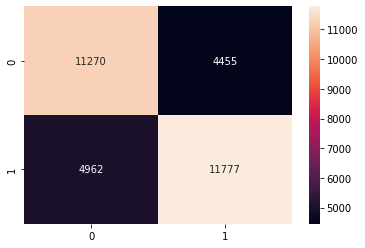

In [92]:
#validar hits arbol

t_pos = 0
t_neg = 0
f_pos = 0
f_neg = 0
total_rows = 0

for index, row in df_general.iterrows():
    result = predict_hit( row['danceability'],row['energy'],row['acousticness'],row['loudness'],row['valence'])
    row_target = row['target']
    
    if row_target == 1 and result == 1:
        t_pos+= 1
    if row_target == 0 and result == 0:
        t_neg+= 1
    
    if row_target == 1 and result == 0:
        f_neg+= 1
    if row_target == 0 and result == 1:
        f_pos+= 1
    
    total_rows +=1

print('Total Rows:', total_rows)
print('True Positive:', t_pos, '=> Relacion:', t_pos/total_rows)
print('True Negative:', t_neg, '=> Relacion:', t_neg/total_rows)
print('False Positive:', f_pos, '=> Relacion:', f_pos/total_rows)
print('False Negative:', f_neg, '=> Relacion:', f_neg/total_rows)

print('Accuracy: ', (t_pos+t_neg)/total_rows)
print('Recall: ', t_pos/(t_pos+f_neg))
print('Precission: ', t_pos/(t_pos+f_pos))

#precission de 70% aljada de nuestro 78% con random tree classifier, aunque mejor que nuestro baseline original

#matriz de confusion
confusion_tree_function = [[t_neg,f_neg],[f_pos,t_pos]]
sns.heatmap(confusion_tree_function,annot=True,fmt='g')
plt.show()

# Curva ROC y área bajo la curva (AUC)

In [93]:
preds_prob = be_rf_f.predict_proba(X_test_F)
fpr,tpr,_ = roc_curve(y_test_F, preds_prob[:,1])
dfRoc = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

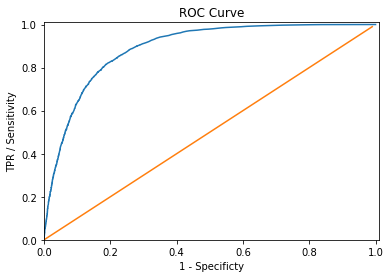

AUC= 0.8906946856644243


In [94]:
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(dfRoc['fpr'],dfRoc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

print('AUC=', auc(fpr, tpr))
#con un AUC de 0.89, existe un 89% de probabilidad de que el modelo distinga 
#entre hit y no hit correctamente

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3b4d89a2-8052-4b43-b8cd-618ee4c0c558' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>